# 3 一般化線形モデル(GLM) -ポアソン回帰-

In [1]:
using CSV
using DataFrames
using GLM
using LaTeXStrings
using Plots
using StatsBase
using StatsPlots

## 3.2 観測されたデータの概要を調べる

In [2]:
df = CSV.read("data/section3.csv")

,y,x,f
,Int64⍰,Float64⍰,String⍰
1,6,8.31,C
2,6,9.44,C
3,6,9.5,C
4,12,9.07,C
5,10,10.16,C
6,4,8.32,C
7,9,10.61,C
8,9,10.06,C
9,9,9.93,C


In [3]:
df.x

100-element Array{Union{Missing, Float64},1}:
  8.31
  9.44
  9.5 
  9.07
 10.16
  8.32
 10.61
 10.06
  9.93
 10.43
 10.36
 10.15
 10.92
  ⋮   
 10.73
  8.85
 11.2 
  9.86
 11.54
 10.03
 11.88
  9.15
  8.52
 10.24
 10.86
  9.97

### 列ごとにデータを表示

In [4]:
df.y

100-element Array{Union{Missing, Int64},1}:
  6
  6
  6
 12
 10
  4
  9
  9
  9
 11
  6
 10
  6
  ⋮
  4
  5
  6
  5
  8
  5
  9
  8
  6
  8
  7
  9

In [5]:
df.f

100-element Array{Union{Missing, String},1}:
 "C"
 "C"
 "C"
 "C"
 "C"
 "C"
 "C"
 "C"
 "C"
 "C"
 "C"
 "C"
 "C"
 ⋮  
 "T"
 "T"
 "T"
 "T"
 "T"
 "T"
 "T"
 "T"
 "T"
 "T"
 "T"
 "T"

### データオブジェクトの型を調べる

In [6]:
typeof(df)

DataFrame

In [7]:
typeof(df.y)

Array{Union{Missing, Int64},1}

In [8]:
typeof(df.x)

Array{Union{Missing, Float64},1}

In [9]:
typeof(df.f)

Array{Union{Missing, String},1}

### データの要約

In [10]:
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Int64,DataType
1,y,7.83,2,8.0,15,,0,Int64
2,x,10.0891,7.19,10.155,12.4,,0,Float64
3,f,,C,,T,2,0,String


## 3.3 統計モデリングの前にデータを図示する
### データの図示
散布図

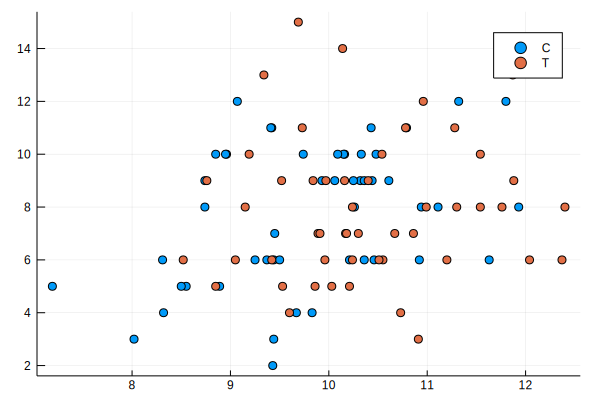

In [11]:
plot(df.x, df.y, group=df.f, seriestype=:scatter)

箱ひけ図

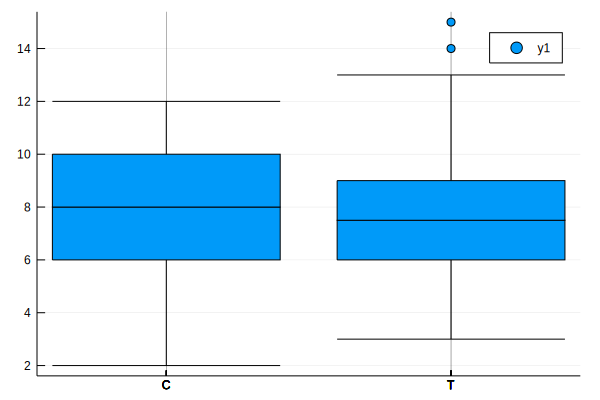

In [12]:
boxplot(df.f, df.y)

## 3.4　ポアソン回帰の統計モデル
### 3.4.2 あてはめと当てはまりの良さ
### GLMのフィッティング
http://juliastats.github.io/GLM.jl/latest/examples/

In [13]:
names(df)

3-element Array{Symbol,1}:
 :y
 :x
 :f

In [14]:
result = glm(@formula(y ~ x), df, Poisson())

StatsModels.DataFrameRegressionModel{GeneralizedLinearModel{GlmResp{Array{Float64,1},Poisson{Float64},LogLink},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: y ~ 1 + x

Coefficients:
              Estimate Std.Error z value Pr(>|z|)
(Intercept)    1.29172  0.363686 3.55174   0.0004
x            0.0756619 0.0356042 2.12509   0.0336


最大対数尤度を表示する

In [15]:
loglikelihood(result)

-235.38625076986077

### 3.4.3 ポアソン回帰モデルによる予測

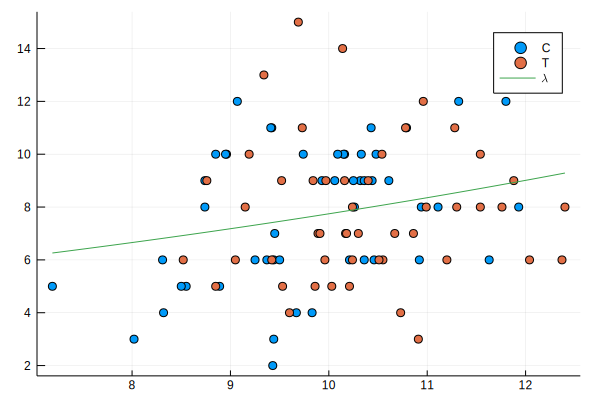

In [16]:
plot(df.x, df.y, group=df.f, seriestype=:scatter)
xx = range(minimum(df.x), maximum(df.x), length=100)
plot!(xx, exp.(1.29 .+ 0.0757 .*xx), label=L"\lambda")

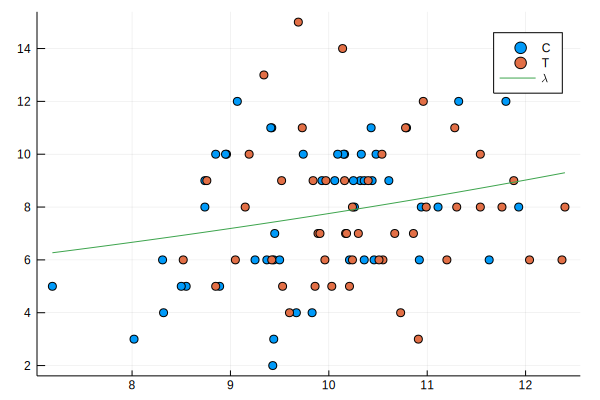

In [17]:
plot(df.x, df.y, group=df.f, seriestype=:scatter)
xx = DataFrame(x=range(minimum(df.x), maximum(df.x), length=100))
yy = predict(result, xx)
plot!(xx.x, yy, label=L"\lambda")

## 3.5 説明変数が因子型の統計モデル

In [18]:
result_f = glm(@formula(y ~ f), df, Poisson())

StatsModels.DataFrameRegressionModel{GeneralizedLinearModel{GlmResp{Array{Float64,1},Poisson{Float64},LogLink},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: y ~ 1 + f

Coefficients:
              Estimate Std.Error  z value Pr(>|z|)
(Intercept)    2.05156  0.050702   40.463   <1e-99
f: T         0.0127716 0.0714756 0.178684   0.8582


In [19]:
loglikelihood(result_f)

-237.6272569606868

## 3.6 説明変数が数量型 + 因子型の統計モデル

In [20]:
result_all = glm(@formula(y ~ x + f), df, Poisson())

StatsModels.DataFrameRegressionModel{GeneralizedLinearModel{GlmResp{Array{Float64,1},Poisson{Float64},LogLink},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: y ~ 1 + x + f

Coefficients:
               Estimate Std.Error   z value Pr(>|z|)
(Intercept)     1.26311  0.369629   3.41722   0.0006
x             0.0800726 0.0370369   2.16197   0.0306
f: T         -0.0319994 0.0743789 -0.430221   0.6670


In [21]:
loglikelihood(result_all)

-235.2937192424937

### 3.6.1 対数リンク関数のわかりやすさ : 掛け算される効果
恒等リンク関数

In [22]:
result_identity = glm(@formula(y ~ x + f), df, Poisson(), IdentityLink())

StatsModels.DataFrameRegressionModel{GeneralizedLinearModel{GlmResp{Array{Float64,1},Poisson{Float64},IdentityLink},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: y ~ 1 + x + f

Coefficients:
              Estimate Std.Error   z value Pr(>|z|)
(Intercept)    1.26602    2.8432  0.445279   0.6561
x             0.660745  0.289658   2.28112   0.0225
f: T         -0.204678  0.582247 -0.351532   0.7252
